In [3]:


import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk(r'C:\Users\aoons\Desktop\brain_mri'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#         print(dirname)

C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\aoons\Desktop\brain_mri\Training\glioma_tumor
C:\Users\a

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score

In [6]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [7]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\aoons\Desktop\brain_mri\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r'C:\Users\aoons\Desktop\brain_mri\valid',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 224, 224, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 110, 110, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 64)     

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=8,validation_split=0.1)

Epoch 1/8
83/83 [==============================] - 764s 9s/step - loss: 0.8569 - accuracy: 0.6481 - val_loss: 1.0846 - val_accuracy: 0.4932
Epoch 2/8
83/83 [==============================] - 795s 10s/step - loss: 0.6544 - accuracy: 0.7397 - val_loss: 1.1324 - val_accuracy: 0.4592
Epoch 3/8
83/83 [==============================] - 667s 8s/step - loss: 0.5404 - accuracy: 0.7919 - val_loss: 0.7337 - val_accuracy: 0.6973
Epoch 4/8
83/83 [==============================] - 619s 7s/step - loss: 0.4206 - accuracy: 0.8528 - val_loss: 0.6615 - val_accuracy: 0.7619
Epoch 5/8
83/83 [==============================] - 579s 7s/step - loss: 0.3177 - accuracy: 0.8842 - val_loss: 0.4459 - val_accuracy: 0.8537
Epoch 6/8
83/83 [==============================] - 539s 6s/step - loss: 0.2447 - accuracy: 0.9168 - val_loss: 0.3784 - val_accuracy: 0.8707
Epoch 7/8
83/83 [==============================] - 582s 7s/step - loss: 0.2185 - accuracy: 0.9224 - val_loss: 0.3816 - val_accuracy: 0.8912
Epoch 8/8
83/83 [==

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

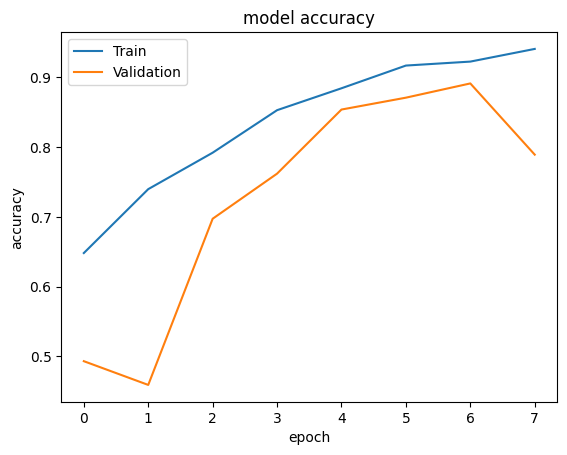

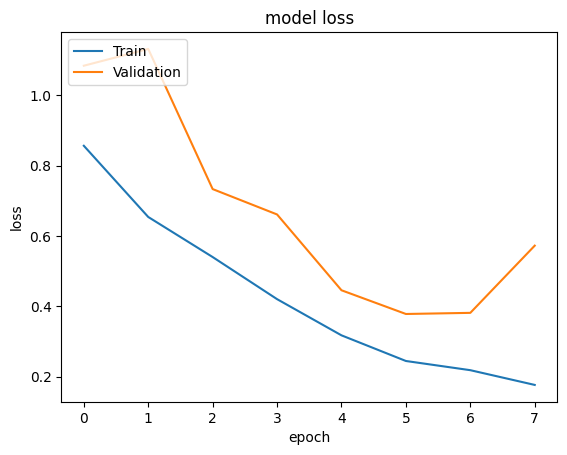

In [24]:
#model.save('braintumor.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Prediction

In [30]:
img = cv2.imread(r"C:\Users\aoons\Desktop\brain_mri\Training\pituitary_tumor\p (42).jpg")
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [31]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

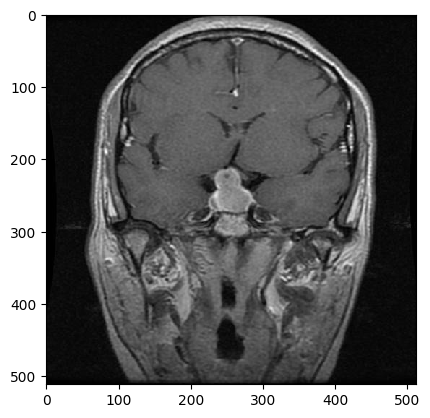

In [32]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\aoons\Desktop\brain_mri\Training\pituitary_tumor\p (42).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [38]:
a = model.predict(img_array)
class_index = a.argmax()
class_name = labels[class_index]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 72ms/step
Predicted class: pituitary_tumor
